# OPTIMIZING SALES AND IMPROVING CUSTOMER EXPERIENCE AT EXPRESSMART

## Introduction: 

This project focuses on providing a comprehensive analysis of sales data across multiple dimensions, including time of day, month, product performance, and regional sales. The data used in this analysis, _ExpressMartData_, want provided by [***Only Quality Data.***](https://sites.google.com/onlyqualitydata.com/onlyqualitydata-internships/home)

## Objective: 
The objective of the ExpressMart Sales Performance Analysis Project is to uncover insights into customer purchasing behaviours, identify peak sales periods, and analyse top-performing products, regional sales performance, and customer purchasing patterns. This analysis will assist ExpressMart in optimizing staffing, inventory management, and marketing strategies while enhancing customer experience and overall sales performance.

## Dataset Overview
1.	Order Id: A unique identifier for each order
2.	Product: Indicates the product ordered by the customer.
3.	Quantity Ordered: The quantity ordered by customer. 
4.	Price: The price of the product
5.	Order Date: The date the order was made. 
6.	Purchase Address: The Purchase address of the customer 
7.	Time: The time of day the order was made
8.	Sales: How much revenue was made from that order. Obtained by multiplying quantity ordered with price




In [29]:
# Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# load expressmart dataset
expressmart_df= pd.read_excel("ExpressMartData. - Copy 2.xlsx")

In [20]:
# load the first 5 rows
expressmart_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time,Sales
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30,"136 Church St, New York City, NY 10001",00:01:00,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29,"562 2nd St, New York City, NY 10001",07:03:00,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12,"277 Main St, New York City, NY 10001",18:21:00,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22,"410 6th St, San Francisco, CA 94016",15:13:00,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18,"43 Hill St, Atlanta, GA 30301",12:38:00,11.95


In [21]:
#checking the data types of the columns
expressmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Time              185950 non-null  object        
 7   Sales             185950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 11.3+ MB


In [22]:
expressmart_df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Time', 'Sales'],
      dtype='object')

### Transforming the Data

In [23]:
# extract the hour from the time column. 
expressmart_df['Hour'] = pd.to_datetime(expressmart_df['Time'], format='%H:%M:%S').dt.hour

# Verify the change
expressmart_df[['Time', 'Hour']]

,Time,Hour
0,00:01:00,0
1,07:03:00,7
2,18:21:00,18
3,15:13:00,15
4,12:38:00,12
...,...,...
185945,19:02:00,19
185946,19:29:00,19
185947,18:57:00,18
185948,18:35:00,18


In [24]:
# Extract the month name and create a new column 'Month'
expressmart_df['Month'] = expressmart_df['Order Date'].dt.strftime('%b')

#%b: Represents the month abbreviation (Jan, Feb, Mar, etc.)

# Verify the change
expressmart_df[['Order Date', 'Month']]

,Order Date,Month
0,2019-12-30,Dec
1,2019-12-29,Dec
2,2019-12-12,Dec
3,2019-12-22,Dec
4,2019-12-18,Dec
...,...,...
185945,2019-06-07,Jun
185946,2019-06-01,Jun
185947,2019-06-22,Jun
185948,2019-06-26,Jun


In [30]:
# Create a function to classify AM/PM
def classify_am_pm(time):
    return 'AM' if time.hour < 12 else 'PM'

# Apply the function to create the 'AM/PM' column
expressmart_df['AM/PM'] = expressmart_df['Time'].apply(classify_am_pm)

# Verify the change
expressmart_df[['Time', 'AM/PM']]

,Time,AM/PM
0,00:01:00,AM
1,07:03:00,AM
2,18:21:00,PM
3,15:13:00,PM
4,12:38:00,PM
...,...,...
185945,19:02:00,PM
185946,19:29:00,PM
185947,18:57:00,PM
185948,18:35:00,PM


In [31]:
# Extract the quarter and format it as 'Qtr 1', 'Qtr 2', etc.
expressmart_df['Quarter'] = 'Qtr ' + expressmart_df['Order Date'].dt.quarter.astype(str)

# Verify the change
expressmart_df[['Order Date', 'Quarter']]

,Order Date,Quarter
0,2019-12-30,Qtr 4
1,2019-12-29,Qtr 4
2,2019-12-12,Qtr 4
3,2019-12-22,Qtr 4
4,2019-12-18,Qtr 4
...,...,...
185945,2019-06-07,Qtr 2
185946,2019-06-01,Qtr 2
185947,2019-06-22,Qtr 2
185948,2019-06-26,Qtr 2


In [34]:
# Extract the year and create a new column 'Year'
expressmart_df['Year'] = expressmart_df['Order Date'].dt.year

# Verify the change
expressmart_df[['Order Date', 'Year']]

,Order Date,Year
0,2019-12-30,2019
1,2019-12-29,2019
2,2019-12-12,2019
3,2019-12-22,2019
4,2019-12-18,2019
...,...,...
185945,2019-06-07,2019
185946,2019-06-01,2019
185947,2019-06-22,2019
185948,2019-06-26,2019


In [43]:
# Extract city name from the 'Purchase Address' column
expressmart_df['City'] = expressmart_df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())



expressmart_df['City'].unique()

array(['New York City', 'San Francisco', 'Atlanta', 'Portland', 'Dallas',
       'Los Angeles', 'Boston', 'Austin', 'Seattle'], dtype=object)

### Performing some Exploratory Data Analysis (EDA)

In [37]:
# Calculate the total quantity
total_quantity = expressmart_df['Quantity Ordered'].sum()

# Calculate the total sales
total_sales = expressmart_df['Sales'].sum()

# Calculate the total number of unique products
total_products = expressmart_df['Product'].nunique()

print(f"Total Quantity: {total_quantity}")
print(f"Total Sales: {total_sales}")
print(f"Total Products: {total_products}")

Total Quantity: 209079
Total Sales: 34492035.97
Total Products: 19


### Creating visuals

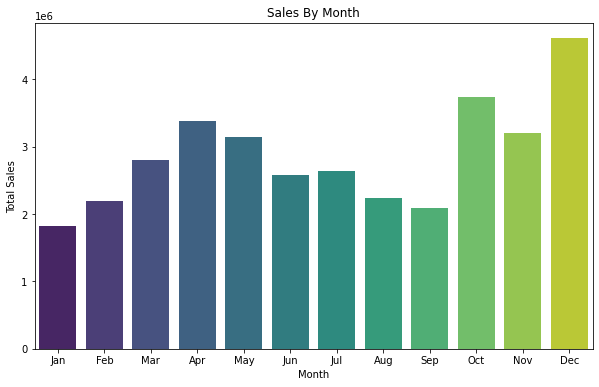

In [46]:
# Group by month and sum sales
monthly_sales = expressmart_df.groupby('Month')['Sales'].sum().reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Plot the histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')


plt.title('Sales By Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [40]:
monthly_sales

Month
Jan    1822256.73
Feb    2202022.42
Mar    2807100.38
Apr    3390670.24
May    3152606.75
Jun    2577802.26
Jul    2647775.76
Aug    2244467.88
Sep    2097560.13
Oct    3736726.88
Nov    3199603.20
Dec    4613443.34
Name: Sales, dtype: float64

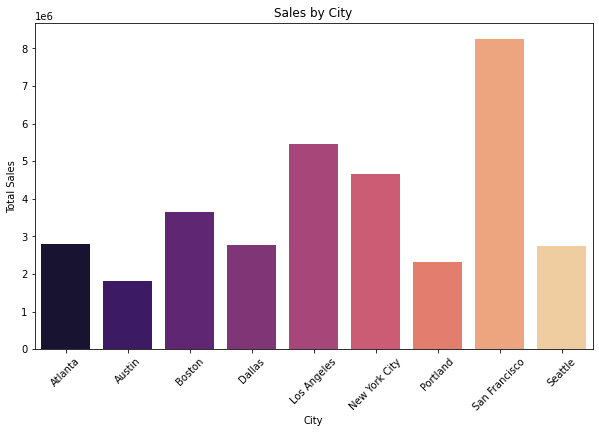

In [61]:
# Group by the 'City' column and sum sales
city_sales = expressmart_df.groupby('City')['Sales'].sum()

# Plot the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=city_sales.index, y=city_sales.values, palette='magma')


plt.title('Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [45]:
city_sales

City
Atlanta          2795498.58
Austin           1819581.75
Boston           3661642.01
Dallas           2767975.40
Los Angeles      5452570.80
New York City    4664317.43
Portland         2320490.61
San Francisco    8262203.91
Seattle          2747755.48
Name: Sales, dtype: float64

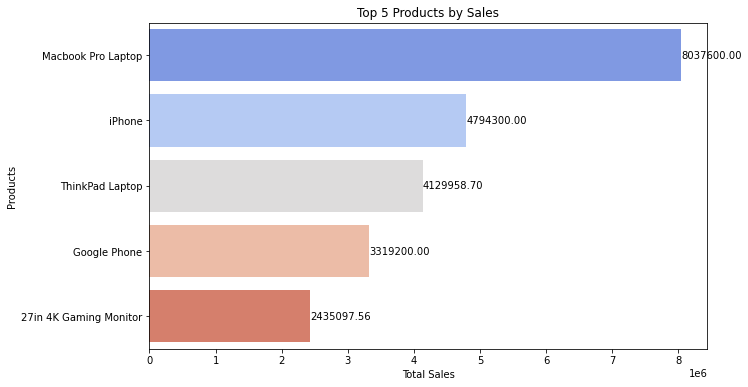

In [47]:
# Group by 'Product' and sum the sales
product_sales = expressmart_df.groupby('Product')['Sales'].sum()

# Sort the product sales in descending order and get the top 5 products
top_5_products = product_sales.sort_values(ascending=False).head(5)

# Plot the bar graph using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_products.values, y=top_5_products.index, palette='coolwarm')

# Add data labels
for index, value in enumerate(top_5_products.values):
    plt.text(value, index, f'{value:.2f}', color='black', va='center')

plt.title('Top 5 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Products')
plt.show()

In [48]:
top_5_products

Product
Macbook Pro Laptop        8037600.00
iPhone                    4794300.00
ThinkPad Laptop           4129958.70
Google Phone              3319200.00
27in 4K Gaming Monitor    2435097.56
Name: Sales, dtype: float64

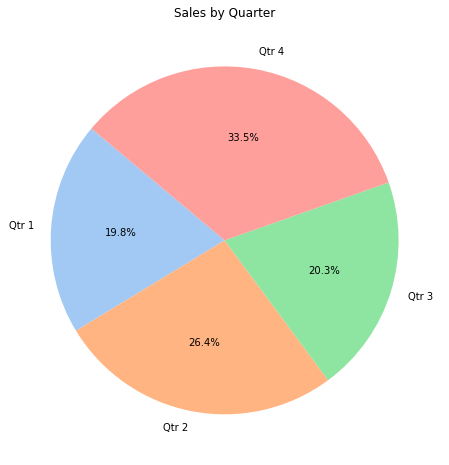

In [49]:
# Group by quarter and sum sales
quarterly_sales = expressmart_df.groupby('Quarter')['Sales'].sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:4]
plt.pie(quarterly_sales, labels=quarterly_sales.index, autopct='%1.1f%%', colors=colors, startangle=140)

plt.title('Sales by Quarter')
plt.show()

In [50]:
quarterly_sales

Quarter
Qtr 1     6831379.53
Qtr 2     9121079.25
Qtr 3     6989803.77
Qtr 4    11549773.42
Name: Sales, dtype: float64

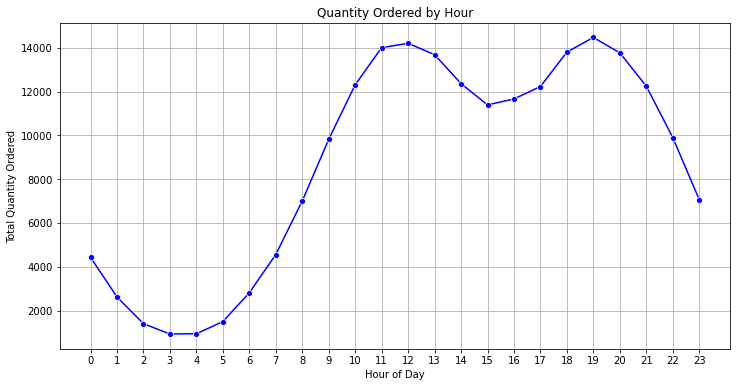

In [57]:
# Group by hour and sum the quantity ordered
hourly_quantity = expressmart_df.groupby('Hour')['Quantity Ordered'].sum()

# Plot the line graph using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_quantity.index, y=hourly_quantity.values, marker='o', linestyle='-', color='b')



plt.title('Quantity Ordered by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Quantity Ordered')
plt.grid(True)
plt.xticks(range(0, 24))  # Ensure all hours are shown on x-axis
plt.show()

In [54]:
hourly_quantity

Hour
0      4428
1      2619
2      1398
3       928
4       937
5      1493
6      2810
7      4556
8      7002
9      9816
10    12308
11    14005
12    14202
13    13685
14    12362
15    11391
16    11662
17    12229
18    13802
19    14470
20    13768
21    12244
22     9899
23     7065
Name: Quantity Ordered, dtype: int64

## Insights

1. **Sales by Month**:
   - **December** had the highest sales at **\$4,613,443.34**, followed closely by **October** at **\$3,736,726.88**.
   - Sales dipped in **September** to **\$2,097,560.13**, indicating it was one of the slower months.
   - Sales show a general upward trend from January to May, peaking in December, suggesting that **seasonal factors**, particularly holiday months, play a significant role.

2. **Sales by City**:
   - **San Francisco** led sales by a substantial margin, achieving **\$8,262,203.91**, indicating strong demand in the area.
   - **Los Angeles** and **New York City** followed, with sales figures of **\$5,452,570.80** and **\$4,664,317.43**, respectively.
   - Smaller cities like **Austin** and **Portland** had lower sales, around **\$1,819,581.75** and **\$2,320,490.61**, respectively, which might point to differing customer bases or regional preferences.

3. **Top 5 Products by Sales**:
   - The **Macbook Pro Laptop** was the top-selling product, generating **\$8,037,600.00**, followed by the **iPhone** and **ThinkPad Laptop** with **\$4,794,300.00** and **\$4,129,958.70**, respectively.
   - High-end tech products dominated sales, suggesting a customer base that values premium technology.
   - The **Google Phone** and **27in 4K Gaming Monitor** also performed well, showing customer interest in both mobile and gaming technologies.

4. **Sales by Quarter**:
   - The **fourth quarter** generated the highest sales, totaling **\$11,549,773.42**, likely due to holiday spending.
   - Sales were lowest in **Q1**, indicating that the **first quarter** is a slower season for ExpressMart.
   - The significant rise in Q4 suggests the impact of **year-end spending**, a trend that could be leveraged for targeted marketing efforts.

5. **Quantity Ordered by Hour of Day**:
   - The highest order quantities occurred from **11 AM to 8 PM**, with peaks around midday and evening (**12 PM: 14,202**, **7 PM: 14,470**).
   - Order quantities were lowest between **midnight and early morning** (12 AM to 4 AM), likely due to reduced customer activity.
   - Afternoon and evening peaks indicate **times of high demand**, which can inform staffing and operational planning.


## Recommendations

1. **Optimizing Staffing and Inventory for Peak Sales Periods**:
   - **Staffing**: Increase staffing levels between 11 AM and 8 PM, especially around the midday and evening peaks, to manage high order volumes and ensure a seamless customer experience. Additional training for peak hour efficiency could further streamline operations.
   - **Inventory Management**: Stock essential items, particularly top-performing products, more heavily during Q4 and holiday months like December. Implement automated reorder thresholds for popular items to prevent stockouts during these high-demand periods.

2. **Marketing Strategies for Top Performing and Underperforming Products**:
   - **Top Performers**: Emphasize high-end technology products, such as the Macbook Pro, iPhone, and ThinkPad Laptop, in marketing campaigns to maintain their visibility. Consider bundling these items with accessories or offering limited-time discounts to enhance their appeal.
   - **Underperforming Products**: Analyze the underperforming product categories to determine the cause of low sales. Target these items with promotional discounts, bundle offers, or strategic positioning in-store and online to boost interest.

3. **Targeted Regional Marketing Campaigns**:
   - **High-Performing Cities**: In cities with high sales volumes like San Francisco, Los Angeles, and New York City, maintain a steady advertising presence. Invest in local marketing partnerships and explore community-based promotions to reinforce customer loyalty.
   - **Growth Opportunities in Smaller Markets**: For cities like Austin and Portland, explore targeted campaigns aimed at growing the customer base. Focus on digital advertising tailored to these regions, offering region-specific discounts or loyalty programs to attract new customers.

4. **Tailoring Marketing to Customer Purchasing Behaviors**:
   - **Demographic-Based Campaigns**: Use demographic data to segment customers by age, income level, and preferences, allowing for customized campaigns that better resonate with specific groups.
   - **Personalized Recommendations**: Implement a recommendation engine based on past purchases to offer personalized suggestions, increasing the likelihood of repeat purchases and boosting sales.

5. **Seasonal Campaigns for Low-Performing Months**:
   - **Q1 Sales Boost**: Plan post-holiday promotions in January and February to counteract the typical Q1 sales slump. Options include clearance sales on older inventory or a “New Year, New Tech” campaign.
   - **End-of-Summer Strategies**: In slower months like August and September, introduce back-to-school or pre-fall promotions to stimulate demand. Consider a “back-to-work” campaign for office supplies or tech upgrades, appealing to both students and professionals returning to their routines.
